In [1]:
import sys
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install nltk
#!{sys.executable} -m pip install re
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install joblib
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install itertools


import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import tree
import numpy as np
import itertools
import openpyxl

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tranca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
stops = stopwords.words("english")
ro = ['eu','tu','el','ea','noi','voi','ei','ele','mea','ta','lui','ei','noastra',
'voastra','lor','mie','tie','noua','voua','sunt','esti','este','suntem',
'sunteti','am','ai','au','ati','a','i','e','este','cu','ce','cine','cui','cei',
'cele','celor','asa','cum','daca','sau','fa','fac','faci','vom','veti','vor',
'va','face','facut','deasupra','dedesubt','pe','la','in','de','ca','pentru',
'sus','jos','v-am','v-ati','te-ai','ne-am','s-au','acum','atunci','inainte',
'inapoi','as','m-as','n-as','n-ai','n-ar','n-am','n-ati','cativa','cateva',
'fiecare','fiecaruia','caruia','fel','inainte','inapoi','hai','langa',
'mine','tine','dupa','sub','peste','si','sau','da','nu','dar','pana','cand',
'fel','o','il','imi','iti','le','ne','aici','acolo','impotriva','din','nou',
'hai','cat','cati','cate','cativa','cateva','asta','aia','ala','astea','astia',
'facem','faceti','intre','printre','s-a','v-au','ne-au','i-au',
'iau','ia','inca','mai','te-ai','te-au','m-ai','i-ai','doar','departe',
'aproape','se','ne','ar','pun','pune','haide','vrea','vrem','vreti','aflu','afli',
'stiu','stii','stiam','stiati','stiau','stie','afla','aflati','aflau','aflam',
'vreo','l-a','l-au','l-ati','sa-ti','sa-mi','sa-i','intr-o','intr-un','nici']
stopro = stops + ro
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    #text = [w for w in text if not w in stopro]
    text = " ".join(text)
    return text

In [13]:
xlsdata = pd.ExcelFile('C:/Users/tranca/Desktop/DISER/bazanouaRo.xlsx', engine='openpyxl') 
traintest = pd.read_excel(xlsdata, header = 0)
traintest_train = traintest.iloc[1:725]
traintest_test = traintest.iloc[726:1000]
print(traintest_test)

       id                                               text label
726   727  Xi jin Ping e un animal de om nu asa  se face ...  fake
727   728  Diploma Activenews pentru programul de rezolva...  real
728   729  Mit demontat: „blandul” Omicron, la fel de sev...  real
729   730                         @piticu21 Poate au covid !  fake
730   731  Companiile Pfizer si Moderna, acuzate de Rusia...  fake
..    ...                                                ...   ...
995   996  Despre IMUNITATE, vaccin, protectie, cu ANTHON...  fake
996   997  Ce s-a intamplat acolo a fost orchestrat de o ...  fake
997   998       Publicitatea oficiala la vaccin este ilegala  fake
998   999                  Omicron este diversiune si panica  fake
999  1000                       Valul 4 e valul vaccinatilor  fake

[274 rows x 3 columns]


In [14]:
traintest_train['label'] = traintest_train['label'].astype(str)
traintest_train['text'] = traintest_train['text'].astype(str)
#traintest_train['text'] = traintest_train['text'].map(lambda x: cleantext(x))

traintest_test['label'] = traintest_test['label'].astype(str)
traintest_test['text'] = traintest_test['text'].astype(str)
#traintest_test['text'] = traintest_test['text'].map(lambda x: cleantext(x))

C:\Users\tranca\AppData\Local\Temp\ipykernel_16980\1261955530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traintest_train['label'] = traintest_train['label'].astype(str)
C:\Users\tranca\AppData\Local\Temp\ipykernel_16980\1261955530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traintest_train['text'] = traintest_train['text'].astype(str)
C:\Users\tranca\AppData\Local\Temp\ipykernel_16980\1261955530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [15]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

SVM
test:
[[ 94  22]
 [ 52 106]]
              precision    recall  f1-score   support

        fake       0.64      0.81      0.72       116
        real       0.83      0.67      0.74       158

    accuracy                           0.73       274
   macro avg       0.74      0.74      0.73       274
weighted avg       0.75      0.73      0.73       274

Accuracy :  0.7299270072992701
Precison :  0.7451962136828657
Recall :  0.7299270072992701
F1 :  0.7286294805100176


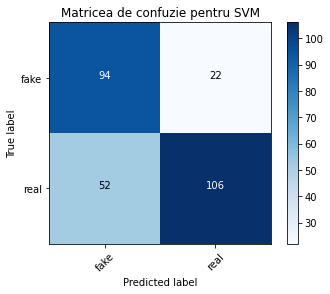

In [16]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(traintest_train['text'],traintest_train['label'])
print('SVM')
print ('test:')

pred=pipeline.predict(traintest_test['text'])
print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru SVM')

Logistic Regression
test:
[[ 91  25]
 [ 50 108]]
              precision    recall  f1-score   support

        fake       0.65      0.78      0.71       116
        real       0.81      0.68      0.74       158

    accuracy                           0.73       274
   macro avg       0.73      0.73      0.73       274
weighted avg       0.74      0.73      0.73       274

Accuracy :  0.7262773722627737
Precison :  0.7354870852940895
Recall :  0.7262773722627737
F1 :  0.7247218597166318


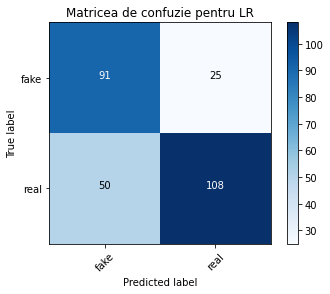

In [17]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(traintest_train['text'],traintest_train['label'])
print('Logistic Regression')
print ('test:')
pred=pipeline.predict(traintest_test['text'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru LR')

Gradient Boost
test:
[[97 19]
 [89 69]]
              precision    recall  f1-score   support

        fake       0.52      0.84      0.64       116
        real       0.78      0.44      0.56       158

    accuracy                           0.61       274
   macro avg       0.65      0.64      0.60       274
weighted avg       0.67      0.61      0.60       274

Accuracy :  0.6058394160583942
Precison :  0.7079009580491098
Recall :  0.6058394160583942
F1 :  0.6162383115589264


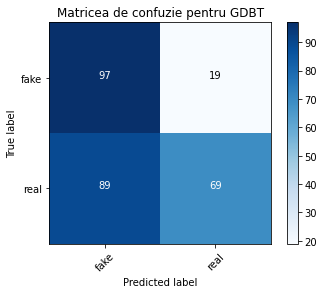

In [9]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(traintest_train['text'],traintest_train['label'])
print('Gradient Boost')
print ('test:')
pred=pipeline.predict(traintest_test['text'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru GDBT')

Decision Tree
test:
[[87 29]
 [80 78]]
              precision    recall  f1-score   support

        fake       0.52      0.75      0.61       116
        real       0.73      0.49      0.59       158

    accuracy                           0.60       274
   macro avg       0.62      0.62      0.60       274
weighted avg       0.64      0.60      0.60       274

Accuracy :  0.6021897810218978
Precison :  0.6499006744895132
Recall :  0.6021897810218978
F1 :  0.6046245418794343


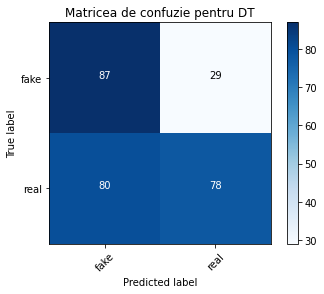

In [10]:
#minor variations in final results due to randomness
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(traintest_train['text'],traintest_train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(traintest_test['text'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru DT')

Decision Tree
test:
[[95 21]
 [68 90]]
              precision    recall  f1-score   support

        fake       0.58      0.82      0.68       116
        real       0.81      0.57      0.67       158

    accuracy                           0.68       274
   macro avg       0.70      0.69      0.68       274
weighted avg       0.71      0.68      0.67       274

Accuracy :  0.6751824817518248
Precison :  0.7179533847139076
Recall :  0.6751824817518248
F1 :  0.6761995517014368


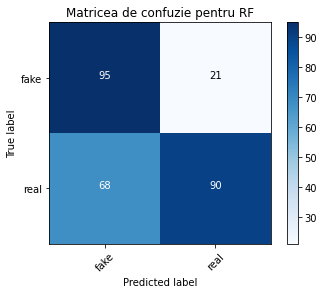

In [11]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(traintest_train['text'],traintest_train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(traintest_test['text'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru RF')

Decision Tree
test:
[[ 85  31]
 [ 46 112]]
              precision    recall  f1-score   support

        fake       0.65      0.73      0.69       116
        real       0.78      0.71      0.74       158

    accuracy                           0.72       274
   macro avg       0.72      0.72      0.72       274
weighted avg       0.73      0.72      0.72       274

Accuracy :  0.718978102189781
Precison :  0.7202863792625539
Recall :  0.718978102189781
F1 :  0.7174472553686162


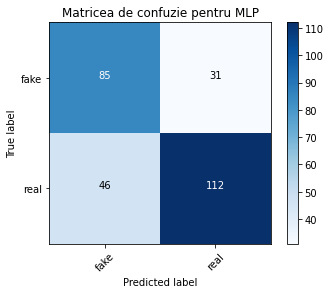

In [12]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c',MLPClassifier())
    ])
fit = pipeline.fit(traintest_train['text'],traintest_train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(traintest_test['text'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru MLP')